<a href="https://colab.research.google.com/github/EnesCaliskan/ImageToTextCNN/blob/main/TextToImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

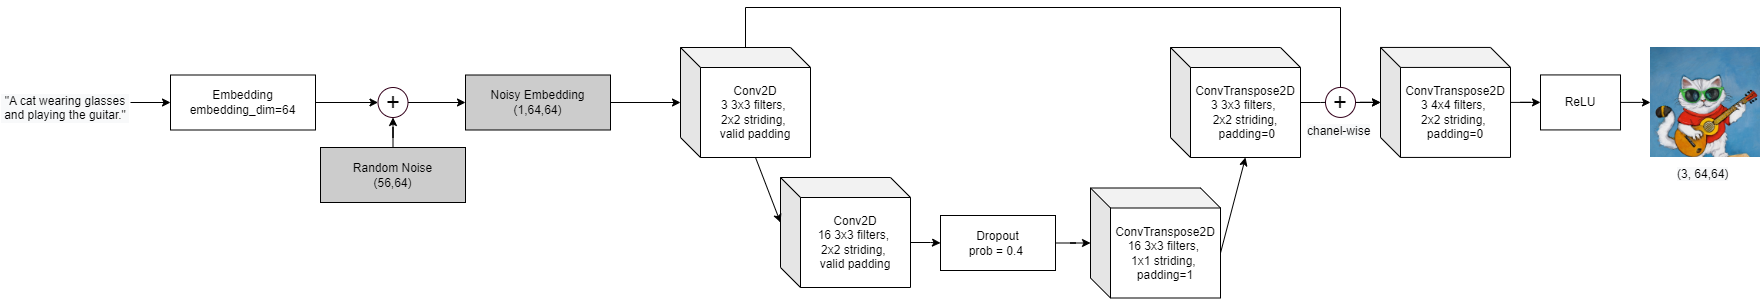

In [8]:
import torch
from torch import nn
from torchvision import models
from torchsummary import summary

In [9]:
text = "A cat wearing glasses and playing the guitar"

# Simple preprocessing the text
word_to_ix = {"A": 0, "cat": 1, "wearing": 2, "glasses": 3, "and": 4, "playing": 5, "the": 6, "guitar":7}
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long) # a tensor representing words by integers

vocab_size = len(lookup_tensor)

In [70]:
class TextToImage(nn.Module):
    def __init__(self, vocab_size):
        super(TextToImage, self).__init__()

        self.embed = nn.Embedding(num_embeddings = vocab_size, embedding_dim= 64)
        self.noise = torch.rand(56,64)

        self.conv1 = nn.Conv2d(in_channels= 1, out_channels=3, kernel_size = (3,3), stride = (2,2), padding = 'valid')
        self.conv2 = nn.Conv2d(in_channels= 3, out_channels=16, kernel_size = (3,3), stride = (2,2), padding = 'valid')
        self.dropout = nn.Dropout(0.4)
        self.convTrans1 = nn.ConvTranspose2d(in_channels = 16, out_channels = 16, kernel_size = (3,3), stride = (1,1), padding = (1,1))
        self.convTrans2 = nn.ConvTranspose2d(in_channels = 16, out_channels = 3, kernel_size = (3,3), stride = (2,2), padding = (0,0))
        self.convTrans3 = nn.ConvTranspose2d(in_channels = 3, out_channels = 3, kernel_size = (4,4), stride = (2,2), padding = (0,0))
        self.relu = nn.ReLU()

    def forward(self, text_tensor):

        text_out = self.embed(text_tensor)
        print('text_out', text_out.shape)

        combined1 = torch.cat((text_out, self.noise), dim=0)
        print('combined1', combined1.shape)

        flatten = combined1.reshape(1,64,64)
        print('flatten', flatten.shape)

        conv1_out = self.conv1(flatten)
        print('conv1_out', conv1_out.shape)

        conv2_out = self.conv2(conv1_out)
        print('conv2_out', conv2_out.shape)

        dropout_out = self.dropout(conv2_out)
        print('dropout_out', dropout_out.shape)

        convTrans1_out = self.convTrans1(dropout_out)
        print('convTrans1_out', convTrans1_out.shape)

        convTrans2_out = self.convTrans2(convTrans1_out)
        print('convTrans2_out', convTrans2_out.shape)

        combined2 = torch.cat((conv1_out, convTrans2_out), dim=1)
        print('combined2', combined2.shape)

        convTrans3_out = self.convTrans3(combined2)
        print('convTrans3_out', convTrans3_out.shape)

        relu_out = self.relu(convTrans3_out)
        print('relu_out', relu_out.shape)






        return relu_out #don't forget to name your last output as image, or just change the name here

In [71]:
texttoimage = TextToImage(vocab_size)

output = texttoimage(lookup_tensor)

output.size()

text_out torch.Size([8, 64])
combined1 torch.Size([64, 64])
flatten torch.Size([1, 64, 64])
conv1_out torch.Size([3, 31, 31])
conv2_out torch.Size([16, 15, 15])
dropout_out torch.Size([16, 15, 15])
convTrans1_out torch.Size([16, 15, 15])
convTrans2_out torch.Size([3, 31, 31])
combined2 torch.Size([3, 62, 31])
convTrans3_out torch.Size([3, 126, 64])
relu_out torch.Size([3, 126, 64])


torch.Size([3, 126, 64])

Expected output

torch.Size( [3, 64, 64] )

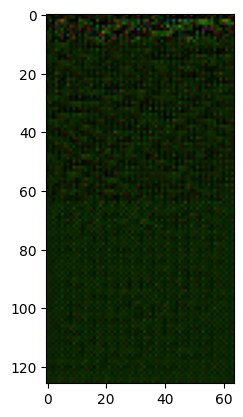

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.moveaxis(output.detach().numpy(), 0,-1))